In [ ]:
import pandas as pd
from glob import glob

In [ ]:
#since every csv file contains different image info we will read all of them together. for this we are using glob for get all csv names in our csv folder
files = glob("data/csv/*")

In [ ]:
#we are reading all csvs and merge them on df object
df=pd.DataFrame()
for item in files:
  filename=item
  temp_df=pd.read_csv(item)
  temp_df['file_name']=filename
  df=pd.concat([df,temp_df])
  
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df

,raw_classification,main_classification,super_classification,type,xmin,ymin,xmax,ymax,coords_x,coords_y,file_name
0,plasma_cell,plasma_cell,sTIL,polyline,105,51,147,86,"108,105,108,115,134,141,147,147,143,135,108","73,65,60,51,51,53,58,80,86,85,73",data/csv/TCGA-D8-A147-DX1_id-5ea40991ddda5f839...
1,plasma_cell,plasma_cell,sTIL,polyline,299,247,324,283,"304,299,300,304,310,315,321,324,317,309,307,304","276,265,255,247,247,250,256,265,283,283,282,276",data/csv/TCGA-D8-A147-DX1_id-5ea40991ddda5f839...
2,plasma_cell,plasma_cell,sTIL,polyline,110,24,145,47,"110,120,123,129,138,139,145,144,143,141,138,12...","34,25,24,24,27,28,38,42,44,45,47,47,45,44,40,34",data/csv/TCGA-D8-A147-DX1_id-5ea40991ddda5f839...
3,plasma_cell,plasma_cell,sTIL,polyline,58,111,83,141,"58,62,66,72,74,79,83,82,81,76,69,66,62,58","127,113,111,111,113,120,127,133,136,141,140,13...",data/csv/TCGA-D8-A147-DX1_id-5ea40991ddda5f839...
4,plasma_cell,plasma_cell,sTIL,polyline,269,285,300,307,"269,275,280,286,294,298,300,299,298,293,283,27...","293,287,285,285,287,290,293,302,303,307,307,30...",data/csv/TCGA-D8-A147-DX1_id-5ea40991ddda5f839...
...,...,...,...,...,...,...,...,...,...,...,...
6,unlabeled,AMBIGUOUS,AMBIGUOUS,polyline,0,176,28,210,"0,1,8,13,19,23,26,28,28,26,25,22,18,15,11,6,3,...","189,182,176,176,180,184,191,197,201,206,208,21...",data/csv/TCGA-OL-A66P-DX1_id-5ea40ab3ddda5f839...
7,plasma_cell,plasma_cell,sTIL,polyline,166,22,197,52,"166,167,170,177,182,185,189,197,196,171,168,16...","35,28,25,22,22,23,29,45,50,52,50,45,35",data/csv/TCGA-OL-A66P-DX1_id-5ea40ab3ddda5f839...
8,plasma_cell,plasma_cell,sTIL,rectangle,174,168,204,198,"174,204,204,174,174","168,168,198,198,168",data/csv/TCGA-OL-A66P-DX1_id-5ea40ab3ddda5f839...
9,plasma_cell,plasma_cell,sTIL,polyline,141,35,166,63,"166,166,159,157,151,145,144,142,141,141,145,14...","38,55,62,63,63,61,60,57,55,51,45,42,35,38",data/csv/TCGA-OL-A66P-DX1_id-5ea40ab3ddda5f839...


# Analyzing our dataframe

In [ ]:
df['raw_classification'].value_counts()

tumor                   21067
lymphocyte              13630
fibroblast               8620
unlabeled                7515
plasma_cell              5562
macrophage               1354
vascular_endothelium      512
ductal_epithelium         498
apoptotic_body            396
mitotic_figure            229
myoepithelium              54
neutrophil                 45
eosinophil                  3
Name: raw_classification, dtype: int64

In [ ]:
df['main_classification'].value_counts()

tumor_nonMitotic       21067
lymphocyte             13630
nonTILnonMQ_stromal     9132
AMBIGUOUS               7911
plasma_cell             5562
macrophage              1354
other_nucleus            600
tumor_mitotic            229
Name: main_classification, dtype: int64

In [ ]:
df['super_classification'].value_counts()

tumor_any         21296
sTIL              19192
nonTIL_stromal    10486
AMBIGUOUS          7911
other_nucleus       600
Name: super_classification, dtype: int64

In [ ]:
df['type'].value_counts()

rectangle    39694
polyline     19680
point          111
Name: type, dtype: int64

## Visulazition

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

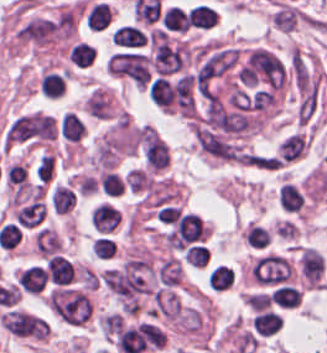

In [ ]:
#we are reading example image
file_name=f"{df['file_name'].iloc[0]}".replace('data/csv','data/rgb').replace('csv','png')
img=cv2.imread(file_name)
cv2_imshow(img)

In [ ]:
#we are painting bounding box according to our dataframe of that object
for i in range(len(df[df['file_name']==filename])):
  x1=df['xmin'].iloc[i]
  y1=df['ymin'].iloc[i]
  x2=df['xmax'].iloc[i]
  y2=df['ymax'].iloc[i]


  bbox=cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

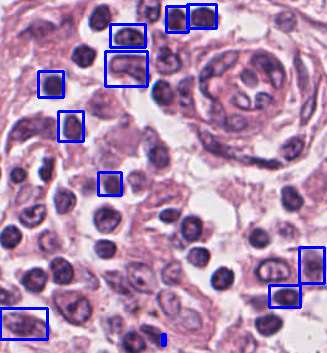

In [ ]:
cv2_imshow(bbox)

In [ ]:
#we are also painging segmentation polylines to check how it looks
poly_image=img.copy()
for i in range(len(df[df['file_name']==filename])):
  polylines=[]
  for j in (range(len(df['coords_x'].iloc[i].split(',')))):
    x=int(df['coords_x'].iloc[i].split(',')[j])
    y=int(df['coords_y'].iloc[i].split(',')[j])
    polylines.append([x,y])

  points = np.array(polylines)
  points = points.reshape((-1, 1, 2))
  poly_image = cv2.polylines(poly_image, [points],True,(255, 0, 0),2)
  
#points

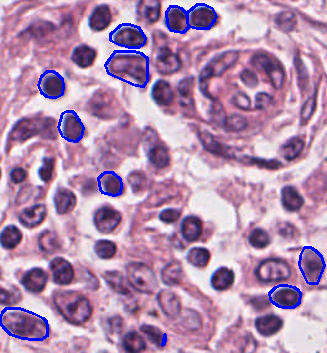

In [ ]:
cv2_imshow(poly_image)